## Raghav Gupta E19CSE258

In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as snb
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.naive_bayes import GaussianNB
from scipy import stats
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier

## Reading the data and checking for null values and handling them

In [91]:
data = pd.read_csv('./1994_census_income.csv')

In [92]:
data.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,gender,capital_gain,capital_loss,hours_per_week,native_country,high_income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,?,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,?,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [93]:
data.replace('?',np.nan,inplace=True)

In [94]:
def HandleMissingValues(data):
    j = 0
    imp = SimpleImputer(missing_values = np.NaN,strategy="most_frequent")
    Col = data.columns
    for i in data.isnull().sum():
        if(i!=0):
            data[Col[j]] = imp.fit_transform(data[[Col[j]]])
        j+=1

In [95]:
HandleMissingValues(data)
data.head(10)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,gender,capital_gain,capital_loss,hours_per_week,native_country,high_income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,9,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [96]:
def LabelEncode():
    string_columns = []
    for i in data.columns:
        if type(data[i][0]) == str :
            string_columns.append(i)
    print(string_columns)
    le = LabelEncoder()
    for i in string_columns:
        data[i] = le.fit_transform(data[[i]])
        print(le.classes_)

In [97]:
LabelEncode()

['workclass', 'education', 'education_num', 'marital_status', 'occupation', 'relationship', 'race', 'gender', 'native_country', 'high_income']
['Federal-gov' 'Local-gov' 'Never-worked' 'Private' 'Self-emp-inc'
 'Self-emp-not-inc' 'State-gov' 'Without-pay']
['10th' '11th' '12th' '1st-4th' '5th-6th' '7th-8th' '9th' 'Assoc-acdm'
 'Assoc-voc' 'Bachelors' 'Doctorate' 'HS-grad' 'Masters' 'Preschool'
 'Prof-school' 'Some-college']
['1' '10' '11' '12' '13' '14' '15' '16' '2' '3' '4' '5' '6' '7' '8' '9']
['Divorced' 'Married-AF-spouse' 'Married-civ-spouse'
 'Married-spouse-absent' 'Never-married' 'Separated' 'Widowed']
['Adm-clerical' 'Armed-Forces' 'Craft-repair' 'Exec-managerial'
 'Farming-fishing' 'Handlers-cleaners' 'Machine-op-inspct' 'Other-service'
 'Priv-house-serv' 'Prof-specialty' 'Protective-serv' 'Sales'
 'Tech-support' 'Transport-moving']
['Husband' 'Not-in-family' 'Other-relative' 'Own-child' 'Unmarried' 'Wife']
['Amer-Indian-Eskimo' 'Asian-Pac-Islander' 'Black' 'Other' 'White']
[

/home/lord/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [98]:
data.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,gender,capital_gain,capital_loss,hours_per_week,native_country,high_income
0,39,6,77516,9,4,4,0,1,4,1,2174,0,40,38,0
1,50,5,83311,9,4,2,3,0,4,1,0,0,13,38,0
2,38,3,215646,11,15,0,5,1,4,1,0,0,40,38,0
3,53,3,234721,1,13,2,5,0,2,1,0,0,40,38,0
4,28,3,338409,9,15,2,9,5,2,0,0,0,40,4,0


In [99]:
data.drop('race',axis=1,inplace=True)

## Visualising the data to determine features to driop and finding outliers

In [100]:
def checkForOutliers():
    for i in data.columns:
        plt.xlabel(i)
        plt.boxplot(data[i])
        plt.show()

<AxesSubplot:>

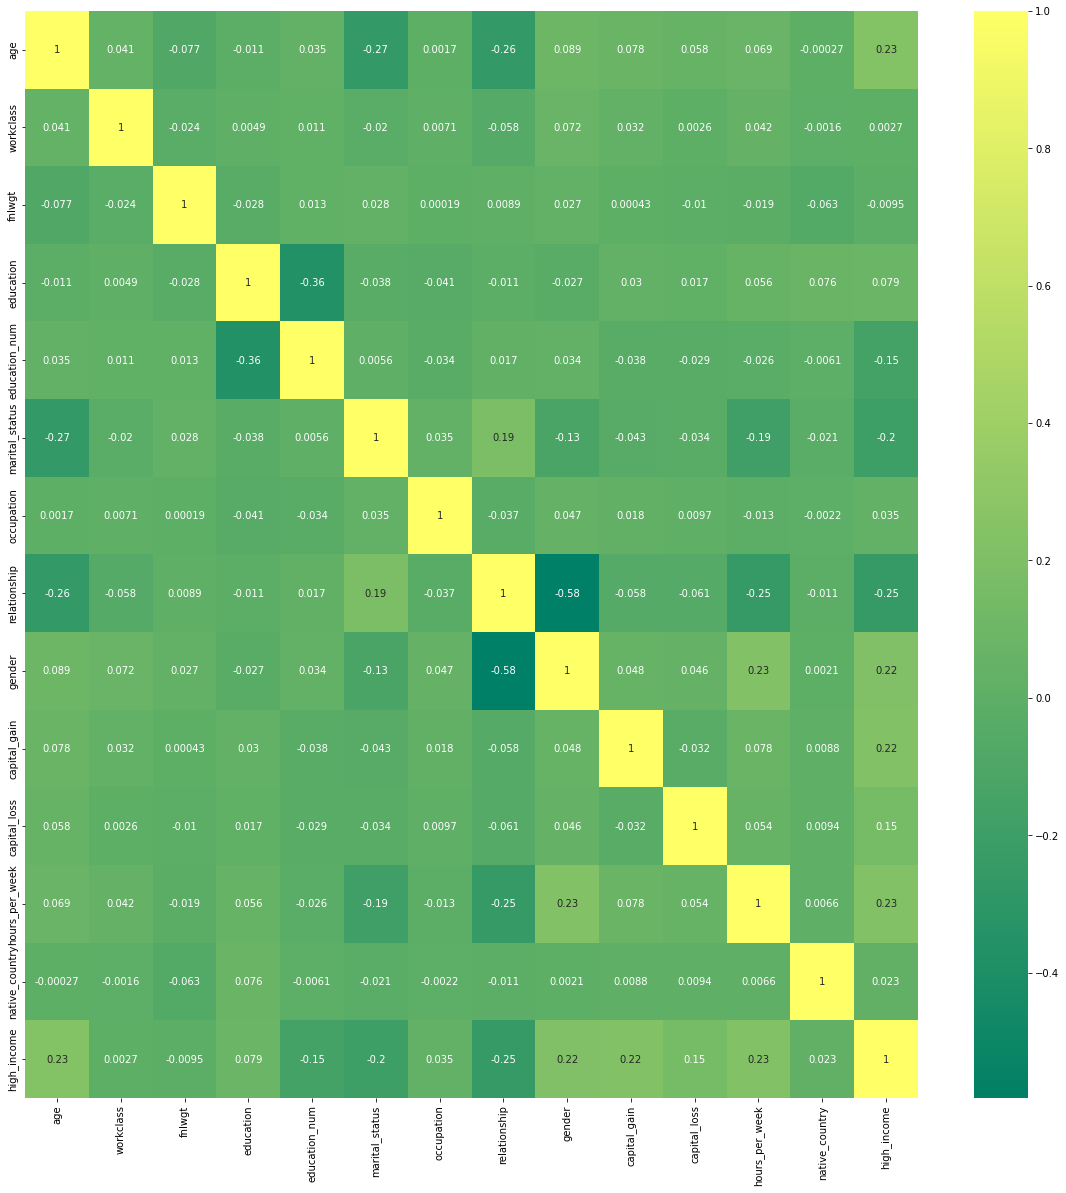

In [101]:
plt.figure(figsize=(20,20))
snb.heatmap(data.corr(),annot=True,cmap='summer')

In [102]:
# checkForOutliers()

In [103]:
outliers = ['age', 'workclass', 'fnlwgt', 'education','capital_gain', 'capital_loss', 'hours_per_week', 'native_country','high_income']
def treatOutliers(arr):
    for i in arr:
        temp = stats.mstats.winsorize(data[i],limits=0.05)
        data[i] = np.array(temp)

In [104]:
treatOutliers(outliers)

In [105]:
# checkForOutliers()

## Making Model

In [106]:
def MakeModel(model):
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    print(classification_report(y_pred , y_test))

In [107]:
X = data[['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'gender',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country']].values
y = data[['high_income']].values

In [108]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=1,train_size=0.7)

In [109]:
MakeModel(RandomForestClassifier())

/tmp/ipykernel_911/1414812992.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train,y_train)


              precision    recall  f1-score   support

           0       0.91      0.89      0.90      7757
           1       0.62      0.68      0.65      2012

    accuracy                           0.85      9769
   macro avg       0.77      0.79      0.77      9769
weighted avg       0.85      0.85      0.85      9769



In [110]:
MakeModel(RandomForestClassifier(bootstrap=False))

/tmp/ipykernel_911/1414812992.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train,y_train)


              precision    recall  f1-score   support

           0       0.91      0.89      0.90      7746
           1       0.61      0.66      0.63      2023

    accuracy                           0.84      9769
   macro avg       0.76      0.78      0.77      9769
weighted avg       0.85      0.84      0.84      9769



In [111]:
MakeModel(RandomForestClassifier(max_depth=3))

/tmp/ipykernel_911/1414812992.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train,y_train)


              precision    recall  f1-score   support

           0       1.00      0.80      0.89      9355
           1       0.17      0.91      0.29       414

    accuracy                           0.81      9769
   macro avg       0.58      0.86      0.59      9769
weighted avg       0.96      0.81      0.86      9769



In [112]:
MakeModel(BaggingClassifier(base_estimator=GaussianNB()))

              precision    recall  f1-score   support

           0       0.96      0.81      0.88      9033
           1       0.21      0.63      0.31       736

    accuracy                           0.79      9769
   macro avg       0.59      0.72      0.60      9769
weighted avg       0.91      0.79      0.83      9769



/home/lord/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [113]:
MakeModel(BaggingClassifier(base_estimator=LogisticRegression()))

/home/lord/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/home/lord/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/lord/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations

              precision    recall  f1-score   support

           0       0.97      0.81      0.88      9060
           1       0.22      0.68      0.33       709

    accuracy                           0.80      9769
   macro avg       0.59      0.75      0.61      9769
weighted avg       0.92      0.80      0.84      9769



In [115]:
for i in range(1,10):
    MakeModel(BaggingClassifier(base_estimator=GaussianNB(),n_estimators=i))
    print()

/home/lord/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/home/lord/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/home/lord/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/home/lord/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exa

              precision    recall  f1-score   support

           0       0.96      0.81      0.88      9027
           1       0.21      0.63      0.31       742

    accuracy                           0.79      9769
   macro avg       0.59      0.72      0.60      9769
weighted avg       0.91      0.79      0.83      9769


              precision    recall  f1-score   support

           0       0.96      0.81      0.88      9037
           1       0.21      0.63      0.31       732

    accuracy                           0.79      9769
   macro avg       0.59      0.72      0.60      9769
weighted avg       0.91      0.79      0.84      9769


              precision    recall  f1-score   support

           0       0.96      0.81      0.88      9036
           1       0.21      0.63      0.31       733

    accuracy                           0.79      9769
   macro avg       0.59      0.72      0.59      9769
weighted avg       0.91      0.79      0.84      9769


              pr

/home/lord/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/home/lord/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/home/lord/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


              precision    recall  f1-score   support

           0       0.96      0.81      0.88      9035
           1       0.21      0.63      0.31       734

    accuracy                           0.79      9769
   macro avg       0.59      0.72      0.59      9769
weighted avg       0.91      0.79      0.84      9769


              precision    recall  f1-score   support

           0       0.96      0.81      0.88      9034
           1       0.21      0.63      0.31       735

    accuracy                           0.79      9769
   macro avg       0.59      0.72      0.60      9769
weighted avg       0.91      0.79      0.84      9769




/home/lord/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
